In [1]:
import pandas as pd
import numpy as np
import requests
import plotly
from plotly.graph_objs import *
import networkx as nx
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
# pd.options.display.max_columns = None

In [2]:
from Analises import *

In [3]:
import seaborn as sns

### Import bibliometrics data in python

In [4]:
c1 = pd.read_excel('todos.xlsx', sheet_name='Account')
columns = pd.read_csv('identificadores.csv')

In [5]:
#Pass dataframe and dict
cd = cleaningDatabase(c1, columns)

#replace strings for lowercase and remove spaces        
cd.lowerSpaceValues(['Author Keywords', 'Document Title', 'Authors'])

#Get all values in columns that are empty or null
# cd.getNullValues()

In [6]:
print('Análise Descritiva')
for x in cd.df[['Publication Name','Language' ,'Document Type']].columns:
    print('-------------------')
    print(cd.df[x].value_counts().head())

Análise Descritiva
-------------------
JOURNAL OF CLEANER PRODUCTION                     114
INTERNATIONAL JOURNAL OF LIFE CYCLE ASSESSMENT     53
PLOS ONE                                           35
ECOLOGICAL MODELLING                               34
SCIENCE OF THE TOTAL ENVIRONMENT                   34
Name: Publication Name, dtype: int64
-------------------
English    1984
Russian       2
Name: Language, dtype: int64
-------------------
Article                       1895
Article; Proceedings Paper      88
Article; Book Chapter            3
Name: Document Type, dtype: int64


In [7]:
df_keywords = cd.df.dropna(subset=['Author Keywords'])

In [8]:
#Criar uma lista com os artigos e palavras chave
lev = ListEachValue(df_keywords, 'Document Title', 'Author Keywords', ';')

In [9]:
df_keywords_only = lev.created.copy()

In [10]:
#Transformar todos as palavras em minusculas 
df_keywords_only['Author Keywords'] = df_keywords_only['Author Keywords'].str.lower()
df_keywords_only['Author Keywords'] = df_keywords_only['Author Keywords'].str.strip()

In [17]:
trend20authors = df_keywords_only.groupby('Author Keywords').count().sort_values(by='title', ascending=False)

In [12]:
trend20authors = trend20authors.unstack().reset_index()[['Author Keywords', 0]]
trend20authors.columns = ['palavras chave', 'quantidade']

In [18]:
trend20authors

,title
Author Keywords,
life cycle assessment,118
sustainability,55
climate change,35
ecosystem services,32
community health workers,32
biodiversity,31
life cycle assessment (lca),30
lca,28
carbon footprint,24


In [70]:
trend20authors.loc[0][0]

' life cycle assessment'

In [71]:
trend20authors.loc[8][0]

'life cycle assessment'

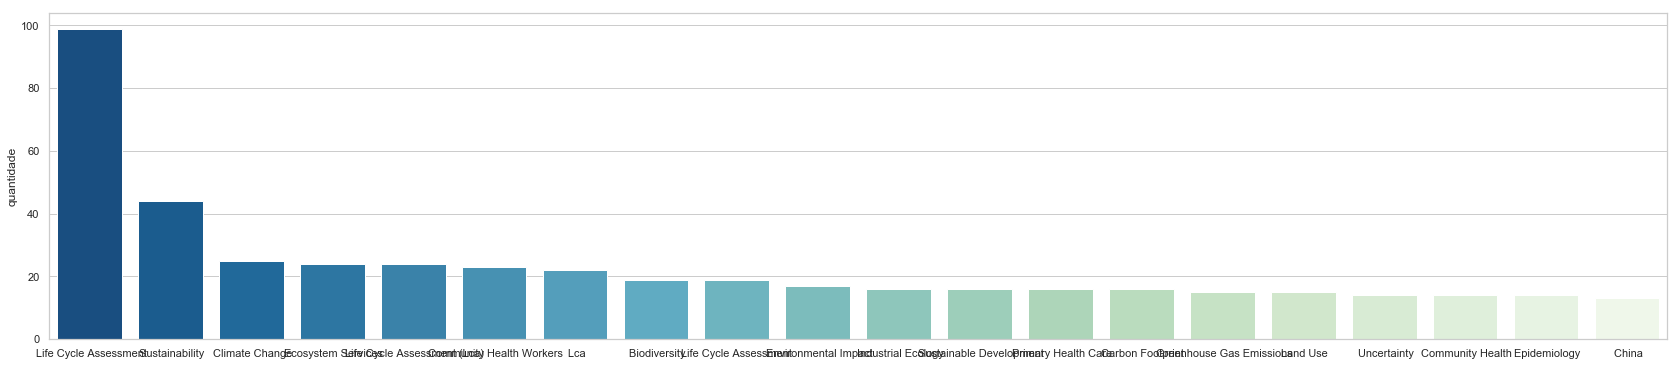

In [24]:
#Show daframe created
import matplotlib.pyplot as plt
sns.set(style="whitegrid", palette="GnBu_r")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(29, 6))

sns.barplot(x=trend20authors[['palavras chave']].apply(lambda x: x[0].title(), axis=1), y=trend20authors['quantidade'], palette="GnBu_r")

In [186]:
lev.df

Index(['Publication Type (J=Journal; B=Book; S=Series; P=Patent)', 'Authors',
       'Book Authors', 'Editors', 'Book Group Authors', 'Author Full Name',
       'Book Authors Full Name', 'Group Authors', 'Document Title',
       'Publication Name', 'Book Series Title', 'Book Series Subtitle',
       'Language', 'Document Type', 'Conference Title', 'Conference Date',
       'Conference Location', 'Conference Sponsors', 'Conference Host',
       'Author Keywords', 'Keywords Plus®', 'Abstract', 'Author Address',
       'Reprint Address', 'E-mail Address', 'ResearcherID Number',
       'ORCID Identifier (Open Researcher and Contributor ID)',
       'Funding Agency and Grant Number', 'Funding Text', 'Cited References',
       'Cited Reference Count',
       'Web of Science Core Collection Times Cited Count',
       'Total Times Cited Count (Web of Science Core Collection, BIOSIS CitationIndex, Chinese Science Citation Database, Data Citation Index, Russian ScienceCitation Index, SciELO Cita

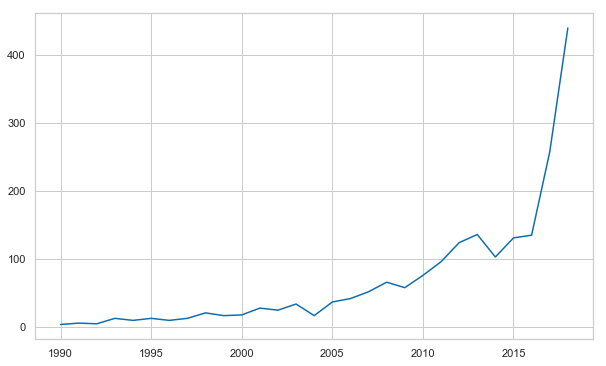

In [203]:
f, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=lev.df.groupby('Year Published').count()['Publication Name'])


In [26]:
lev.group('title').head()

,Authors,title
2847,"Laurie, CC",8
3305,"Margni, M",8
3417,"McKinlay, JB",7
1835,"Gogarten, SM",7
4623,"Sala, S",7


In [99]:
#Count authors in table
len(lev.group('title'))

8016

In [98]:
#Count nummbeer of article in table
len(cd.df['Authors'])

1987

In [83]:
cd.df.iloc[0]

Publication Type (J=Journal; B=Book; S=Series; P=Patent)                                                                           J
Authors                                                                            Gao, GY; Shen, Q; Zhang, Y; Pan, NQ; Ma, Y; Ji...
Book Authors                                                                                                                     NaN
Editors                                                                                                                          NaN
Book Group Authors                                                                                                               NaN
Author Full Name                                                                   Gao, Guangyao; Shen, Qin; Zhang, Yan; Pan, Nai...
Book Authors Full Name                                                                                                           NaN
Group Authors                                                        